# Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
This would be helpful if we are to train our model to take NLP inputs.

In [113]:
import pandas as pd
from datetime import datetime
from functools import partial


data = pd.read_csv("Module1Solutions.csv")#loading week2.csv file
del data['Unnamed: 0']
duplicate_data = data 
data.head()#loading first few lines of week2.csv file

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change


In [24]:
data.Date.dtype # Date type is object so we need it to change to datetime64 

dtype('O')

In [25]:
data['Date'] = pd.to_datetime(data['Date'])
data.Date.dtype
#datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the endian-ness of the machine

dtype('<M8[ns]')

In [29]:
data.set_index('Date', inplace = True)
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change
2017-05-22,MINDTREE,EQ,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,2017,500.566573,0.009749,Slight or No change
2017-05-23,MINDTREE,EQ,502.35,504.00,507.45,491.00,498.00,501.15,498.72,452893,2.258664e+08,8567,198703,43.87,5,2017,500.656820,-0.002389,Slight or No change
2017-05-24,MINDTREE,EQ,501.15,502.00,515.00,494.05,511.95,509.95,506.72,823967,4.175211e+08,15083,351179,42.62,5,2017,502.697776,0.017560,Slight or No change
2017-05-25,MINDTREE,EQ,509.95,513.70,549.50,508.45,542.50,543.90,532.14,1632427,8.686829e+08,25072,693340,42.47,5,2017,515.189734,0.066575,Slight or No change


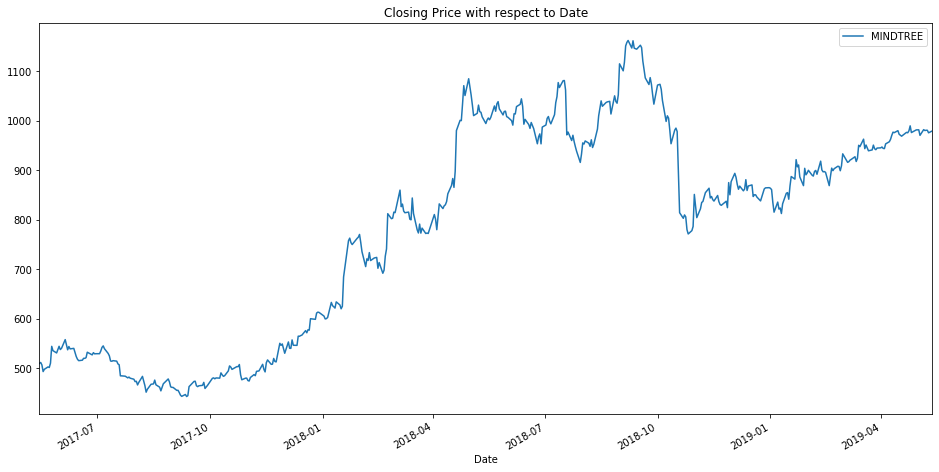

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Close Price'].plot(label = 'MINDTREE',figsize=(16,8),title='Closing Price with respect to Date')
plt.legend()

In [50]:
data['Close Price'].diff().abs().sort_values(ascending = False)
#stored this data in a csv file and analyzed each cell and found that only top 5 closing price differences are significant and hence can be considered as drastic change days
#These close price 
#Date
# 2018-10-19    164.05
# 2018-07-19     90.65
# 2018-04-20     82.25
# 2018-02-23     71.20
# 2018-10-31     64.70
# we will fetch news articles for these 5 days only
# news for 2018-10-31 not available
# news for 2018-10-19, 2018-07-19,2018-02-23 and 2018-04-20 are only available



Date
2018-10-19    164.05
2018-07-19     90.65
2018-04-20     82.25
2018-02-23     71.20
2018-10-31     64.70
2018-08-31     62.65
2018-01-18     59.30
2018-01-22     54.95
2018-11-28     50.65
2018-03-05     45.50
2018-03-15     44.10
2018-10-08     42.30
2019-01-22     39.35
2018-10-01     38.55
2018-04-02     38.25
2017-11-27     37.60
2018-04-26     36.90
2018-08-27     36.75
2018-06-14     36.00
2019-01-29     35.00
2018-09-21     34.15
2017-05-25     33.95
2018-06-29     33.90
2018-04-30     33.90
2018-04-25     33.75
2018-03-06     33.45
2018-09-05     32.95
2018-03-19     32.95
2018-05-02     32.95
2018-04-19     32.50
               ...  
2018-05-30      0.60
2019-05-08      0.55
2017-07-13      0.55
2017-09-19      0.50
2017-11-10      0.50
2019-02-14      0.50
2019-02-26      0.50
2019-04-01      0.45
2017-10-09      0.40
2017-11-09      0.40
2017-11-21      0.40
2018-12-31      0.40
2018-06-07      0.40
2018-07-17      0.35
2019-04-04      0.30
2017-06-30      0.30
2017-12-

In [93]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
# more than 1 news is available for a single date so using different related variables
url_2018_10_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1103-cholamandalam-securities-3064341.html'
r = requests.get(url_2018_10_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Printing news for only 4 dates since the 5th date has no news")
print("Obtaining news from Money Control")
print("News for 2018-10-19")
print("Only 1 news is available on this date")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_07_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1115-hdfc-securities-2734761.html'
r = requests.get(url_2018_07_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_07_19")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_04_20 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1000-reliance-securities-2553515.html'
r = requests.get(url_2018_04_20) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_04_20")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_02_23 = 'https://www.moneycontrol.com/news/business/buy-mindtree-pidilite-industries-sell-upl-tata-steel-tata-motors-sudarshan-sukhani-2513371.html'
r = requests.get(url_2018_02_23) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_02_23")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")


Printing news for only 4 dates since the 5th date has no news
Obtaining news from Money Control
News for 2018-10-19
Only 1 news is available on this date


Title:
Buy Mindtree; target of Rs 1103: Cholamandalam Securities


Subject:
Cholamandalam Securities is bullish on Mindtree has recommended buy rating on the stock with a target price of Rs 1103 in its research report dated October 19, 2018.


Report:
In 2QFY19, Mindtree’s revenue grew by 7.1% QoQ to INR 17.5bn in line with our expectations of INR 17.6bn largely driven by volume (+6.3% QoQ) and INR depreciation. In USD terms, revenues grew by 2% QoQ. In constant currency terms, revenue grew by 2.4% QoQ. Revenue from Digital business grew by 3.3% QoQ contributing 48.1% to total revenues. EBITDA grew by 16.8% QoQ to INR 2.7bn in-line with our expectations. EBITDA margin expanded by 130bps QoQ to 15.4%. EBITDA margin expanded on account of rupee depreciation (+130 bps) and presence of one off cost in the base quarter (+60bps) which was

# Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

C:\Users\rajat\Anaconda3\envs\latest_Everything-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

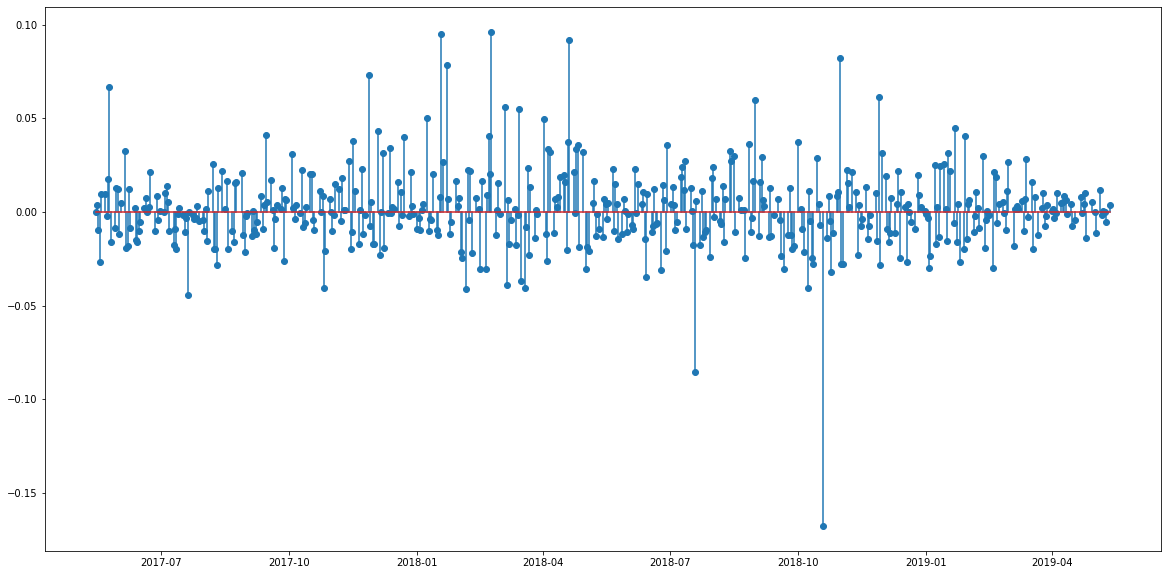

In [138]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])

# Query 2.3 
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

C:\Users\rajat\Anaconda3\envs\latest_Everything-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

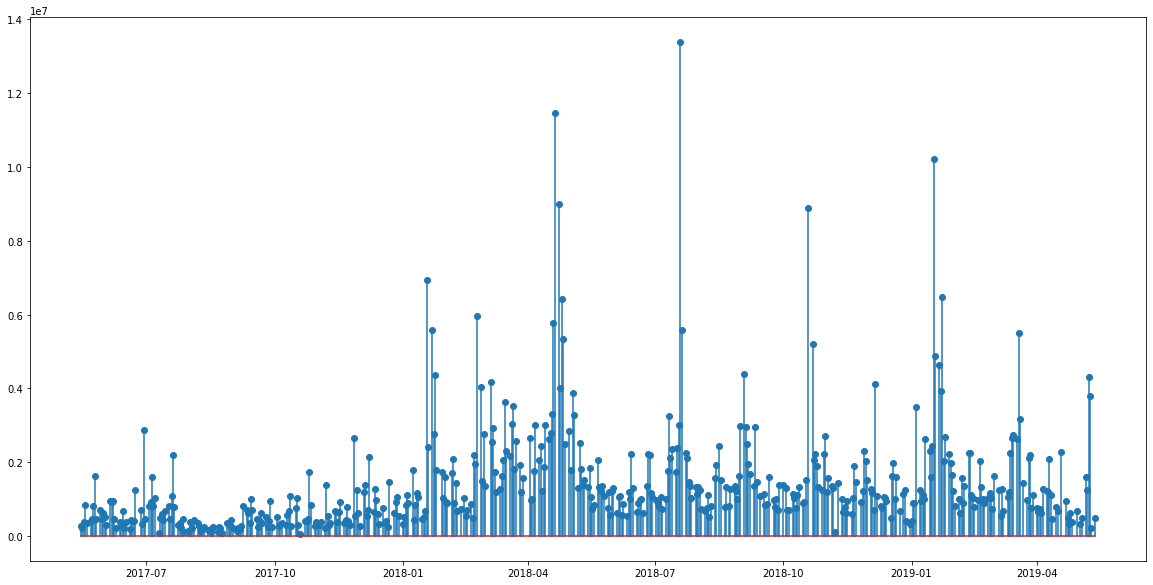

In [139]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])

C:\Users\rajat\Anaconda3\envs\latest_Everything-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


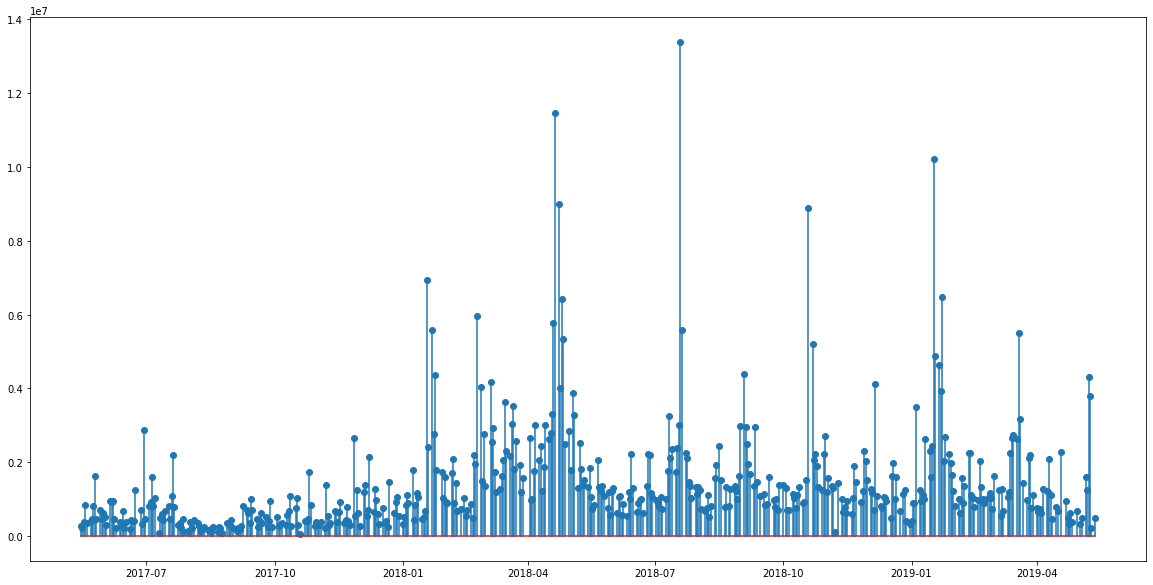

C:\Users\rajat\Anaconda3\envs\latest_Everything-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


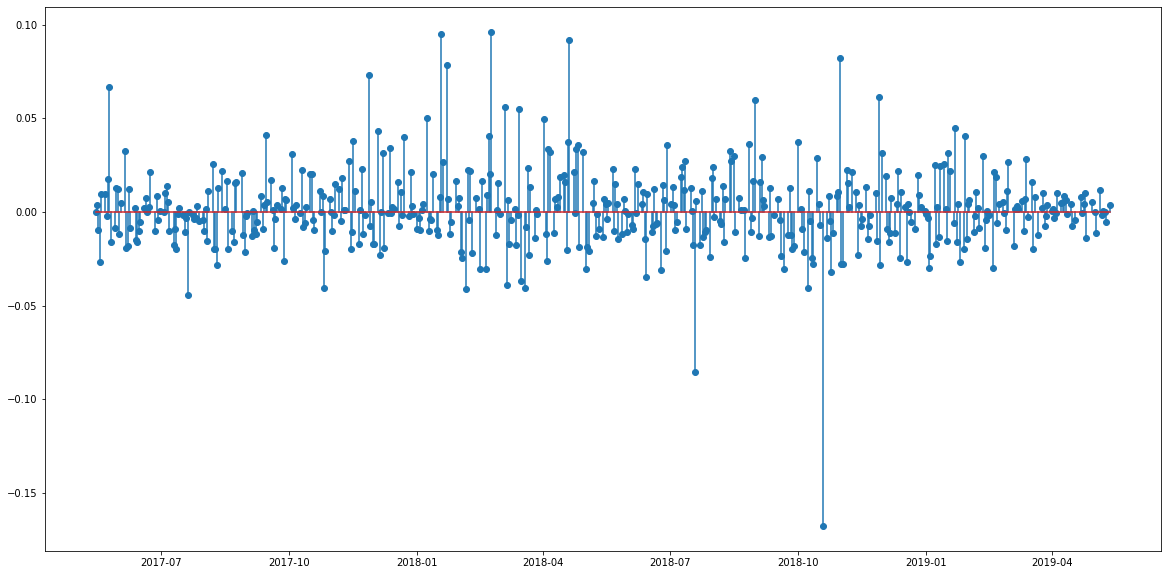

In [143]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])
plt.show()


C:\Users\rajat\Anaconda3\envs\latest_Everything-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


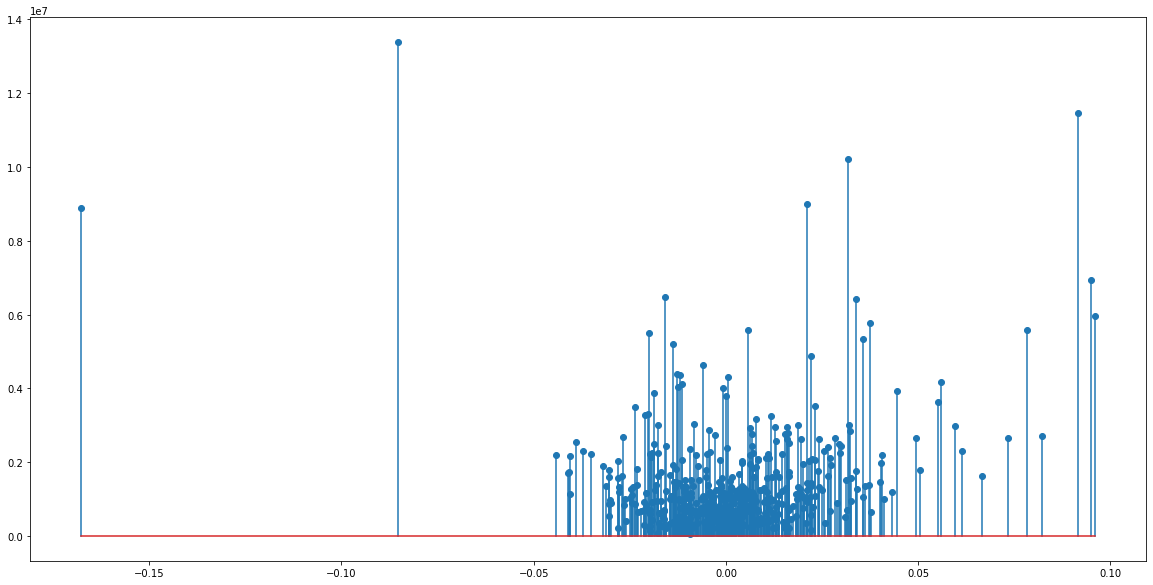

C:\Users\rajat\Anaconda3\envs\latest_Everything-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


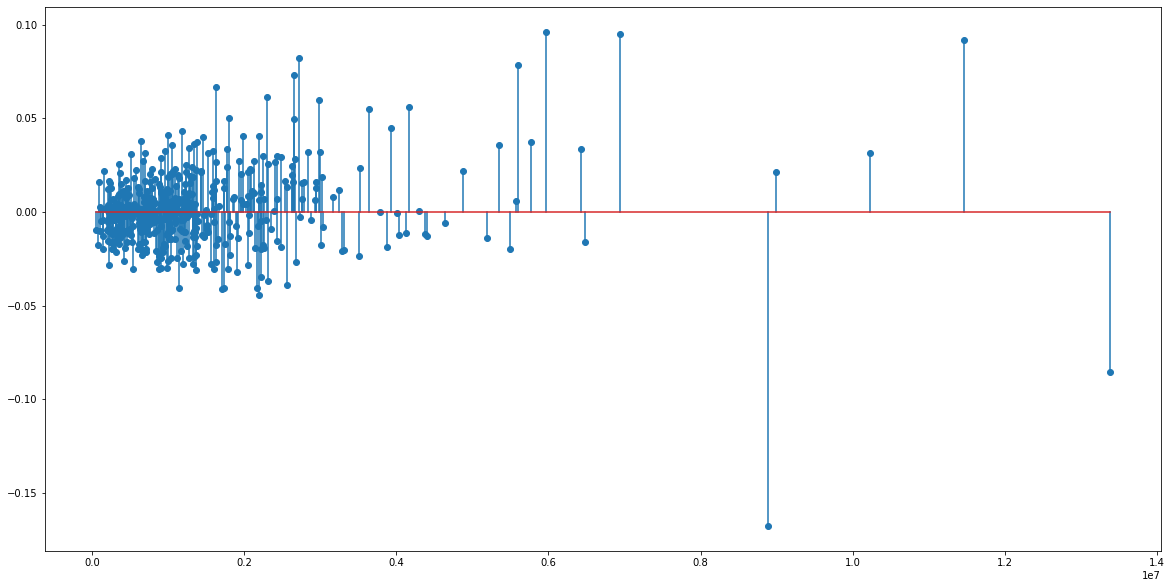

In [168]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

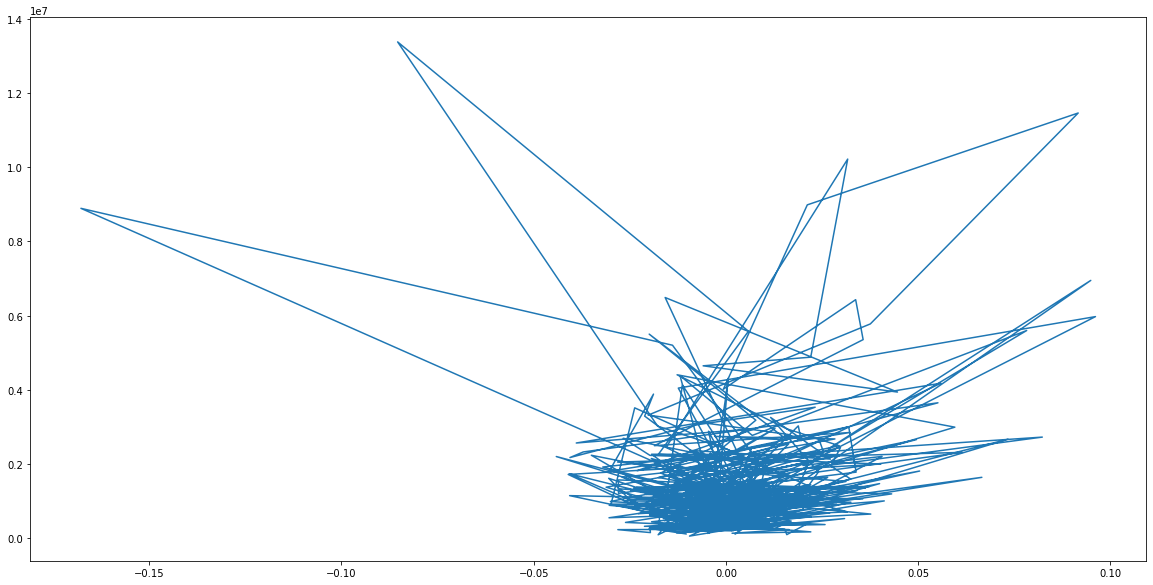

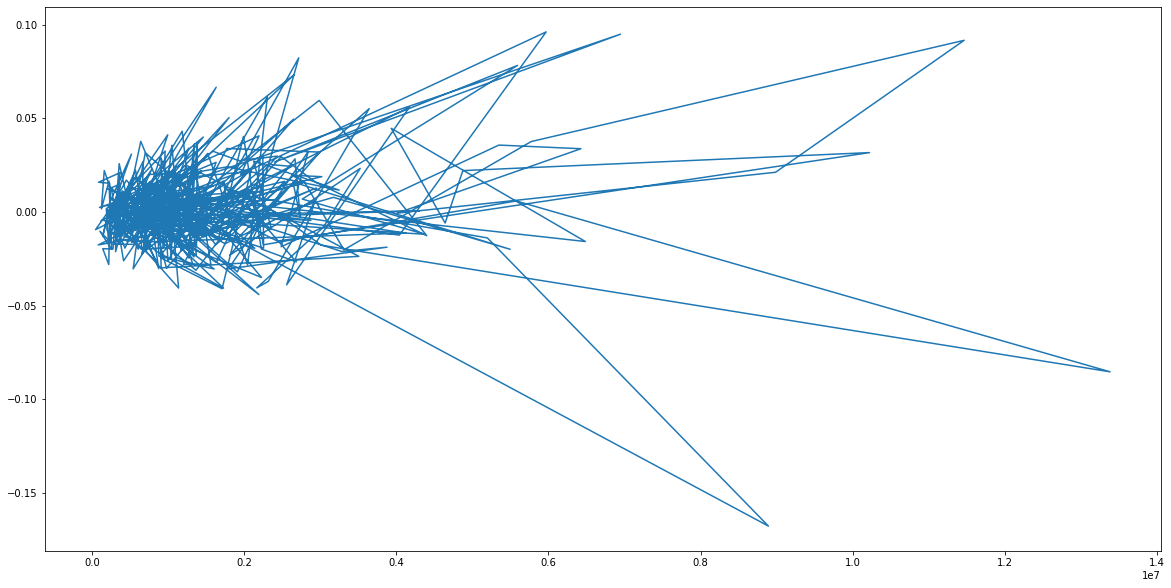

In [167]:
plt.figure(figsize=(20,10))
plt.plot(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.plot(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

In [149]:
# Documentation:-
# Analysis: The positive hills of Day_Perc_Change vs Date plot matches slightly with the Total Traded Quantity vs Date plot.
# Inference: It implies that whenever the positive daily percentages increases our total traded quantity also rises by somewhat the same amount.
# And since the daily changing percentage depends upon the closing prices of each day hence closing prices play a major in the increase of the total traded quantity

# Query 2.4 
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [159]:
import matplotlib.pyplot as plt
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = data['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 494})

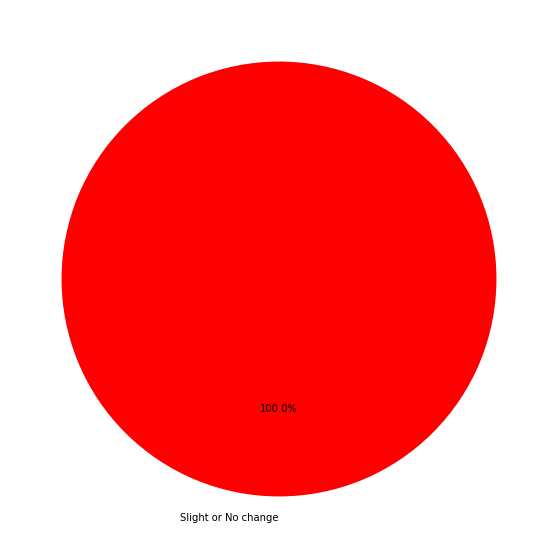

In [190]:
# So we only have 1 trend so there will be only 1 color pie chart 
counter = [494]
labels= ['Slight or No change']
colors = ['r']
plt.figure(figsize=(20,10))
plt.pie(counter, labels=labels,colors=colors,startangle=90, autopct='%.1f%%')
plt.show()

In [178]:
# We will find the average of each trend type
# here we only have 1 trend which is Slight or No change hence only 1 bar graph
import matplotlib.pyplot as plt

gk = data.groupby(['Trend'])['Total Traded Quantity']
gk.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,1.388615e+06,1.450169e+06,46300.0,572476.25,1006586.5,1631997.25,13385207.0


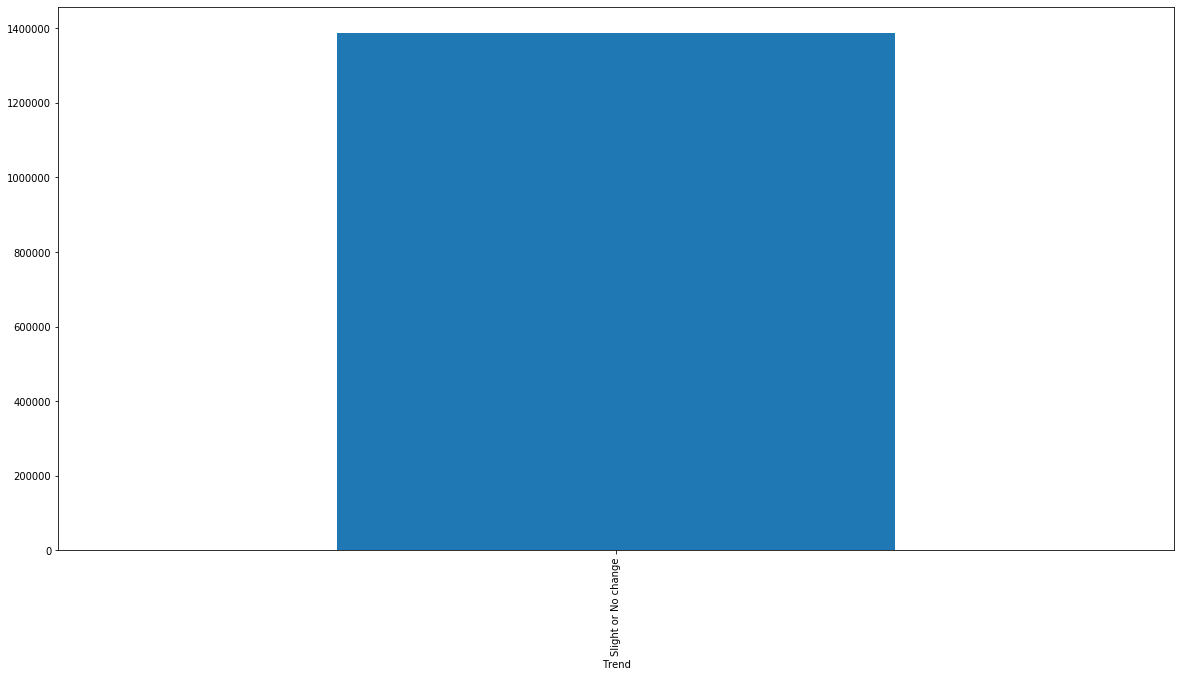

In [193]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

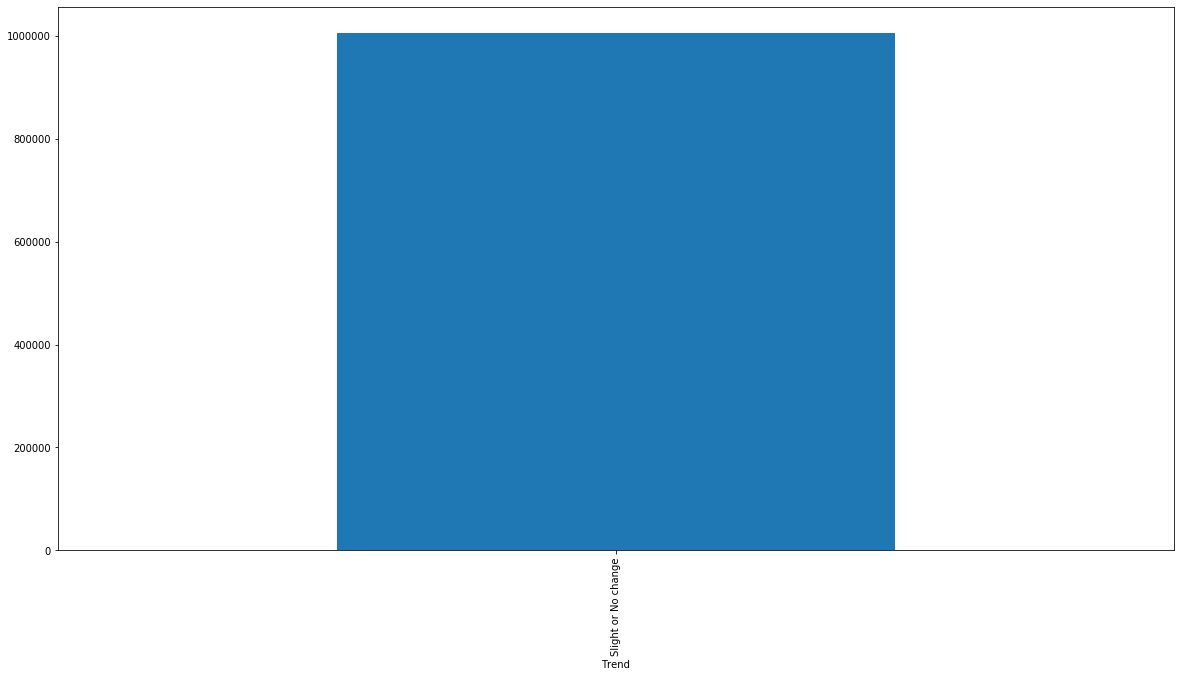

In [192]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

# Query 2.5 
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

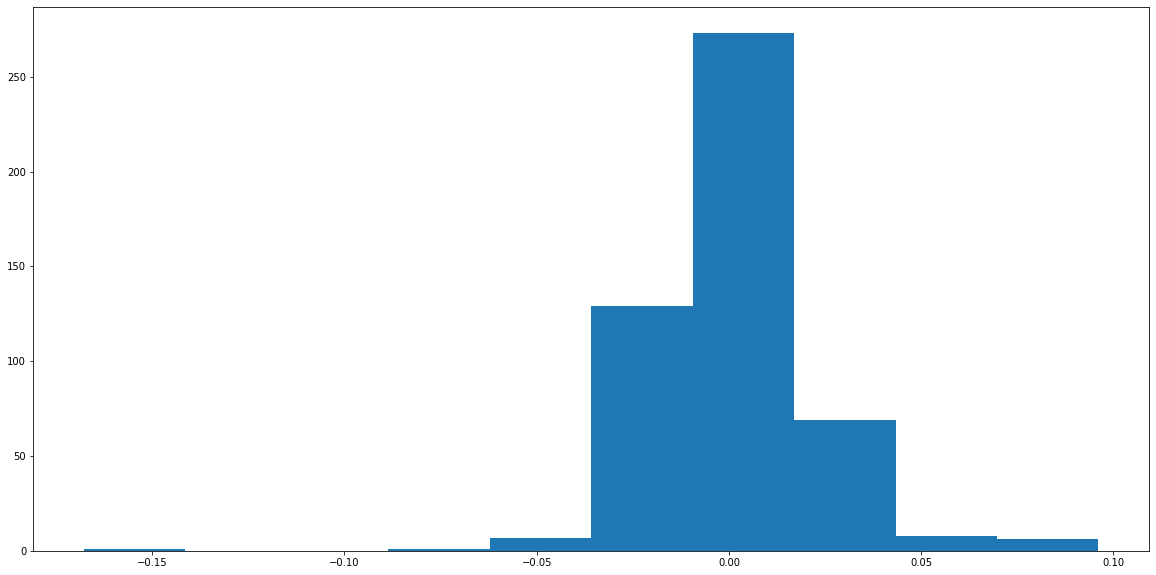

In [191]:
plt.figure(figsize=(20,10))
plt.hist(data['Day_Perc_Change'])
plt.show()

# Query 2.6 
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [8]:
import pandas as pd
wipro_data = pd.read_csv('wipro_stock_data.csv')
tcs_data = pd.read_csv('tcs_stock_data.csv')
itc_data = pd.read_csv('itc_stock_data.csv')
cub_data = pd.read_csv('cub_stock_data.csv')
airtel_data = pd.read_csv('airtel_stock_data.csv')


In [9]:
wipro_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.80,260.05,255.85,256.50,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.10,258.25,255.00,257.10,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.00,268.95,257.00,268.50,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.20,273.50,262.10,264.00,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.70,265.80,261.30,263.40,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46
5,WIPRO,EQ,13-Jul-2017,263.80,263.90,265.85,261.45,263.25,264.05,264.07,1624316,4.289408e+08,42297,1004699,61.85
6,WIPRO,EQ,14-Jul-2017,264.05,264.15,264.95,259.00,260.00,259.85,261.04,2454505,6.407118e+08,26482,1745504,71.11
7,WIPRO,EQ,17-Jul-2017,259.85,266.40,274.00,264.55,268.30,266.85,268.57,7769247,2.086617e+09,77803,3130717,40.30
8,WIPRO,EQ,18-Jul-2017,266.85,267.30,272.65,266.50,269.00,269.00,269.29,2753504,7.415038e+08,51369,1230138,44.68
9,WIPRO,EQ,19-Jul-2017,269.00,270.00,272.05,267.30,271.55,271.10,269.87,2973058,8.023333e+08,34946,1899172,63.88


In [10]:
tcs_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,06-Jul-2017,2356.00,2359.00,2361.90,2340.10,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
1,TCS,EQ,07-Jul-2017,2347.55,2350.00,2356.45,2325.50,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2,TCS,EQ,10-Jul-2017,2331.95,2341.00,2444.90,2341.00,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
3,TCS,EQ,11-Jul-2017,2434.95,2426.00,2514.80,2426.00,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
4,TCS,EQ,12-Jul-2017,2475.80,2482.50,2483.30,2430.10,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00
5,TCS,EQ,13-Jul-2017,2439.45,2445.00,2472.00,2426.60,2439.00,2446.40,2449.50,1565980,3.835873e+09,64700,819249,52.32
6,TCS,EQ,14-Jul-2017,2446.40,2383.00,2425.00,2375.00,2399.10,2397.45,2396.18,2254216,5.401499e+09,95561,853385,37.86
7,TCS,EQ,17-Jul-2017,2397.45,2397.70,2422.10,2382.20,2397.10,2395.45,2402.63,1105911,2.657095e+09,49251,668063,60.41
8,TCS,EQ,18-Jul-2017,2395.45,2396.15,2443.00,2396.15,2415.10,2408.35,2418.05,954001,2.306824e+09,67981,587896,61.62
9,TCS,EQ,19-Jul-2017,2408.35,2415.50,2460.00,2415.10,2449.25,2449.60,2442.01,1957788,4.780944e+09,87419,1244355,63.56


In [11]:
itc_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.30,338.75,331.30,337.10,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.00,338.20,333.05,334.50,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.00,367.70,331.00,333.00,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.00,335.05,330.00,330.20,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.40,333.60,327.40,329.80,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77
5,ITC,EQ,13-Jul-2017,328.85,332.00,339.50,331.00,339.25,338.75,337.11,17491942,5.896790e+09,103161,9981095,57.06
6,ITC,EQ,14-Jul-2017,338.75,339.95,339.95,334.80,337.75,337.15,336.10,5586611,1.877637e+09,56860,3128407,56.00
7,ITC,EQ,17-Jul-2017,337.15,335.00,335.00,320.70,323.25,325.15,327.62,20320210,6.657235e+09,146553,13791627,67.87
8,ITC,EQ,18-Jul-2017,325.15,292.65,292.65,276.40,284.70,284.55,284.65,149479681,4.254992e+10,667965,86293484,57.73
9,ITC,EQ,19-Jul-2017,284.55,287.80,292.90,286.20,291.95,291.45,289.94,39134264,1.134666e+10,236758,21472247,54.87


In [12]:
cub_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.60,179.25,181.00,178.80,180.10,180.00,180.04,513327,9.241908e+07,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.00,182.00,182.75,179.40,182.20,181.55,181.40,150843,2.736324e+07,2074,88526,58.69
2,CUB,EQ,10-Jul-2017,181.55,180.00,185.35,180.00,184.80,184.80,184.11,90882,1.673227e+07,776,68791,75.69
3,CUB,EQ,11-Jul-2017,184.80,186.90,187.60,182.10,183.00,183.50,182.90,1138652,2.082593e+08,5030,987514,86.73
4,CUB,EQ,12-Jul-2017,183.50,184.40,184.75,182.30,182.50,183.05,183.39,313207,5.743804e+07,3905,244864,78.18
5,CUB,EQ,13-Jul-2017,183.05,173.00,178.00,169.55,173.80,174.15,174.39,881346,1.537023e+08,37883,449353,50.98
6,CUB,EQ,14-Jul-2017,174.15,175.00,178.80,171.50,173.50,172.45,174.94,347392,6.077374e+07,7138,163682,47.12
7,CUB,EQ,17-Jul-2017,172.45,174.90,174.90,168.90,170.20,169.60,171.37,273879,4.693470e+07,3860,167615,61.20
8,CUB,EQ,18-Jul-2017,169.60,171.00,172.00,165.15,167.50,166.70,168.33,370626,6.238626e+07,2961,299333,80.76
9,CUB,EQ,19-Jul-2017,166.70,168.00,168.00,163.00,163.35,164.05,165.44,220251,3.643737e+07,2653,137272,62.33


In [13]:
airtel_data 

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.30,376.55,382.85,373.95,381.20,381.30,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.30,384.00,387.55,383.00,387.55,385.90,385.28,4371065,1.684069e+09,37883,3261760,74.62
2,BHARTIARTL,EQ,10-Jul-2017,385.90,388.10,410.15,388.00,405.00,405.70,404.08,1901518,7.683562e+08,14555,881739,46.37
3,BHARTIARTL,EQ,11-Jul-2017,405.70,404.15,408.90,393.45,394.45,395.45,401.71,5565524,2.235742e+09,68716,3113596,55.94
4,BHARTIARTL,EQ,12-Jul-2017,395.45,397.80,402.30,394.45,399.00,397.10,397.28,2608465,1.036278e+09,39662,1147573,43.99
5,BHARTIARTL,EQ,13-Jul-2017,397.10,402.25,404.90,398.70,403.95,403.15,401.44,2594966,1.041720e+09,46805,1453269,56.00
6,BHARTIARTL,EQ,14-Jul-2017,403.15,405.05,408.60,402.20,405.95,407.00,406.22,2184660,8.874500e+08,37219,1169138,53.52
7,BHARTIARTL,EQ,17-Jul-2017,407.00,409.50,410.00,405.95,409.00,408.45,407.88,2269037,9.254867e+08,59516,1626564,71.69
8,BHARTIARTL,EQ,18-Jul-2017,408.45,406.20,430.00,406.20,408.50,408.30,414.77,3640766,1.510070e+09,47942,1413098,38.81
9,BHARTIARTL,EQ,19-Jul-2017,408.30,410.00,422.80,407.25,420.50,421.25,418.88,4600139,1.926888e+09,68760,2141418,46.55


In [15]:
filter_wipro = wipro_data[wipro_data.Series == 'EQ']
filter_wipro

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.80,260.05,255.85,256.50,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.10,258.25,255.00,257.10,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.00,268.95,257.00,268.50,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.20,273.50,262.10,264.00,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.70,265.80,261.30,263.40,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46
5,WIPRO,EQ,13-Jul-2017,263.80,263.90,265.85,261.45,263.25,264.05,264.07,1624316,4.289408e+08,42297,1004699,61.85
6,WIPRO,EQ,14-Jul-2017,264.05,264.15,264.95,259.00,260.00,259.85,261.04,2454505,6.407118e+08,26482,1745504,71.11
7,WIPRO,EQ,17-Jul-2017,259.85,266.40,274.00,264.55,268.30,266.85,268.57,7769247,2.086617e+09,77803,3130717,40.30
8,WIPRO,EQ,18-Jul-2017,266.85,267.30,272.65,266.50,269.00,269.00,269.29,2753504,7.415038e+08,51369,1230138,44.68
9,WIPRO,EQ,19-Jul-2017,269.00,270.00,272.05,267.30,271.55,271.10,269.87,2973058,8.023333e+08,34946,1899172,63.88


In [140]:
filter_tcs = tcs_data[tcs_data.Series == 'EQ']
filter_tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,06-Jul-2017,2356.00,2359.00,2361.90,2340.10,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
1,TCS,EQ,07-Jul-2017,2347.55,2350.00,2356.45,2325.50,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2,TCS,EQ,10-Jul-2017,2331.95,2341.00,2444.90,2341.00,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
3,TCS,EQ,11-Jul-2017,2434.95,2426.00,2514.80,2426.00,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
4,TCS,EQ,12-Jul-2017,2475.80,2482.50,2483.30,2430.10,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00
5,TCS,EQ,13-Jul-2017,2439.45,2445.00,2472.00,2426.60,2439.00,2446.40,2449.50,1565980,3.835873e+09,64700,819249,52.32
6,TCS,EQ,14-Jul-2017,2446.40,2383.00,2425.00,2375.00,2399.10,2397.45,2396.18,2254216,5.401499e+09,95561,853385,37.86
7,TCS,EQ,17-Jul-2017,2397.45,2397.70,2422.10,2382.20,2397.10,2395.45,2402.63,1105911,2.657095e+09,49251,668063,60.41
8,TCS,EQ,18-Jul-2017,2395.45,2396.15,2443.00,2396.15,2415.10,2408.35,2418.05,954001,2.306824e+09,67981,587896,61.62
9,TCS,EQ,19-Jul-2017,2408.35,2415.50,2460.00,2415.10,2449.25,2449.60,2442.01,1957788,4.780944e+09,87419,1244355,63.56


In [17]:
filter_itc = itc_data[itc_data.Series == 'EQ']
filter_itc

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.30,338.75,331.30,337.10,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.00,338.20,333.05,334.50,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.00,367.70,331.00,333.00,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.00,335.05,330.00,330.20,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.40,333.60,327.40,329.80,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77
5,ITC,EQ,13-Jul-2017,328.85,332.00,339.50,331.00,339.25,338.75,337.11,17491942,5.896790e+09,103161,9981095,57.06
6,ITC,EQ,14-Jul-2017,338.75,339.95,339.95,334.80,337.75,337.15,336.10,5586611,1.877637e+09,56860,3128407,56.00
7,ITC,EQ,17-Jul-2017,337.15,335.00,335.00,320.70,323.25,325.15,327.62,20320210,6.657235e+09,146553,13791627,67.87
8,ITC,EQ,18-Jul-2017,325.15,292.65,292.65,276.40,284.70,284.55,284.65,149479681,4.254992e+10,667965,86293484,57.73
9,ITC,EQ,19-Jul-2017,284.55,287.80,292.90,286.20,291.95,291.45,289.94,39134264,1.134666e+10,236758,21472247,54.87


In [18]:
filter_cub = cub_data[cub_data.Series == 'EQ']
filter_cub

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.60,179.25,181.00,178.80,180.10,180.00,180.04,513327,9.241908e+07,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.00,182.00,182.75,179.40,182.20,181.55,181.40,150843,2.736324e+07,2074,88526,58.69
2,CUB,EQ,10-Jul-2017,181.55,180.00,185.35,180.00,184.80,184.80,184.11,90882,1.673227e+07,776,68791,75.69
3,CUB,EQ,11-Jul-2017,184.80,186.90,187.60,182.10,183.00,183.50,182.90,1138652,2.082593e+08,5030,987514,86.73
4,CUB,EQ,12-Jul-2017,183.50,184.40,184.75,182.30,182.50,183.05,183.39,313207,5.743804e+07,3905,244864,78.18
5,CUB,EQ,13-Jul-2017,183.05,173.00,178.00,169.55,173.80,174.15,174.39,881346,1.537023e+08,37883,449353,50.98
6,CUB,EQ,14-Jul-2017,174.15,175.00,178.80,171.50,173.50,172.45,174.94,347392,6.077374e+07,7138,163682,47.12
7,CUB,EQ,17-Jul-2017,172.45,174.90,174.90,168.90,170.20,169.60,171.37,273879,4.693470e+07,3860,167615,61.20
8,CUB,EQ,18-Jul-2017,169.60,171.00,172.00,165.15,167.50,166.70,168.33,370626,6.238626e+07,2961,299333,80.76
9,CUB,EQ,19-Jul-2017,166.70,168.00,168.00,163.00,163.35,164.05,165.44,220251,3.643737e+07,2653,137272,62.33


In [19]:
filter_airtel = airtel_data[airtel_data.Series == 'EQ']
filter_airtel

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.30,376.55,382.85,373.95,381.20,381.30,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.30,384.00,387.55,383.00,387.55,385.90,385.28,4371065,1.684069e+09,37883,3261760,74.62
2,BHARTIARTL,EQ,10-Jul-2017,385.90,388.10,410.15,388.00,405.00,405.70,404.08,1901518,7.683562e+08,14555,881739,46.37
3,BHARTIARTL,EQ,11-Jul-2017,405.70,404.15,408.90,393.45,394.45,395.45,401.71,5565524,2.235742e+09,68716,3113596,55.94
4,BHARTIARTL,EQ,12-Jul-2017,395.45,397.80,402.30,394.45,399.00,397.10,397.28,2608465,1.036278e+09,39662,1147573,43.99
5,BHARTIARTL,EQ,13-Jul-2017,397.10,402.25,404.90,398.70,403.95,403.15,401.44,2594966,1.041720e+09,46805,1453269,56.00
6,BHARTIARTL,EQ,14-Jul-2017,403.15,405.05,408.60,402.20,405.95,407.00,406.22,2184660,8.874500e+08,37219,1169138,53.52
7,BHARTIARTL,EQ,17-Jul-2017,407.00,409.50,410.00,405.95,409.00,408.45,407.88,2269037,9.254867e+08,59516,1626564,71.69
8,BHARTIARTL,EQ,18-Jul-2017,408.45,406.20,430.00,406.20,408.50,408.30,414.77,3640766,1.510070e+09,47942,1413098,38.81
9,BHARTIARTL,EQ,19-Jul-2017,408.30,410.00,422.80,407.25,420.50,421.25,418.88,4600139,1.926888e+09,68760,2141418,46.55


In [28]:
import pandas as pd

columns = ['Wipro','TCS','ITC','CUB','Airtel']
close_prices_dataFrame = pd.DataFrame(columns = columns)
close_prices_dataFrame['Wipro'] = filter_wipro['Close Price']
close_prices_dataFrame['TCS'] = filter_tcs['Close Price']
close_prices_dataFrame['ITC'] = filter_itc['Close Price']
close_prices_dataFrame['CUB'] = filter_cub['Close Price']
close_prices_dataFrame['Airtel'] = filter_airtel['Close Price']
close_prices_dataFrame.dropna()

,Wipro,TCS,ITC,CUB,Airtel
0,257.75,2347.55,337.10,180.00,381.30
1,257.70,2331.95,334.30,181.55,385.90
2,268.25,2434.95,333.30,184.80,405.70
3,263.20,2475.80,330.40,183.50,395.45
4,263.80,2439.45,328.85,183.05,397.10
5,264.05,2446.40,338.75,174.15,403.15
6,259.85,2397.45,337.15,172.45,407.00
7,266.85,2395.45,325.15,169.60,408.45
8,269.00,2408.35,284.55,166.70,408.30
9,271.10,2449.60,291.45,164.05,421.25


In [30]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna()

,Wipro,TCS,ITC,CUB,Airtel
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000194,-0.006645,-0.008306,0.008611,0.012064
2,0.040939,0.044169,-0.002991,0.017901,0.051309
3,-0.018826,0.016777,-0.008701,-0.007035,-0.025265
4,0.002280,-0.014682,-0.004691,-0.002452,0.004172
5,0.000948,0.002849,0.030105,-0.048621,0.015235
6,-0.015906,-0.020009,-0.004723,-0.009762,0.009550
7,0.026939,-0.000834,-0.035592,-0.016527,0.003563
8,0.008057,0.005385,-0.124865,-0.017099,-0.000367
9,0.007807,0.017128,0.024249,-0.015897,0.031717


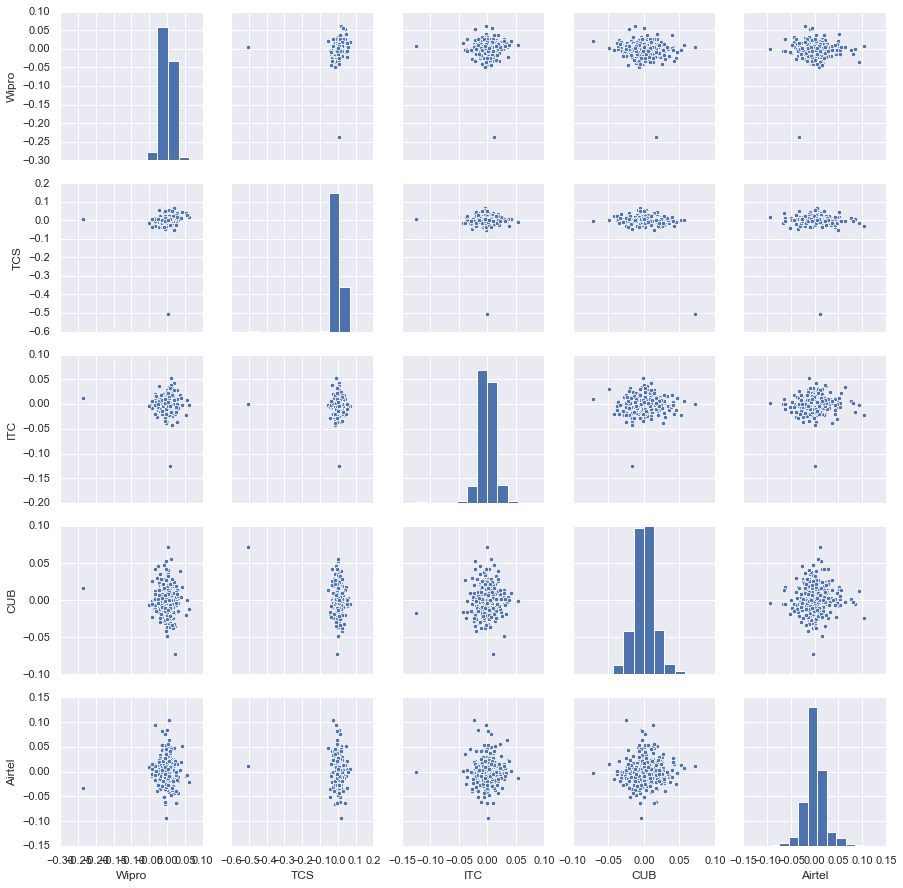

In [45]:
import seaborn as sns

sns.set(color_codes=True)
sns.pairplot(pct_change_dataFrame)



# Query 2.7 
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [68]:
import matplotlib.pyplot as plt
rolling_avg_wipro = pct_change_dataFrame['Wipro'].rolling(7).mean()
rolling_avg_wipro

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.001320
7      0.005168
8      0.006347
9      0.001614
10     0.003276
11     0.011920
12     0.014532
13     0.015824
14     0.011877
15     0.010899
16     0.009463
17     0.010194
18     0.004369
19     0.001137
20    -0.000168
21     0.000079
22    -0.000908
23    -0.000762
24    -0.000912
25    -0.003235
26    -0.001982
27    -0.000288
28     0.000282
29     0.000308
         ...   
465   -0.000008
466   -0.002407
467   -0.001685
468   -0.002217
469    0.000582
470    0.001681
471    0.004579
472    0.005426
473    0.005544
474    0.006036
475    0.005640
476    0.004779
477    0.005716
478    0.003464
479    0.002454
480    0.003715
481    0.001426
482   -0.001460
483   -0.005198
484   -0.005889
485   -0.007055
486   -0.006542
487   -0.006284
488   -0.007757
489   -0.006674
490   -0.002460
491   -0.000773
492   -0.000502
493   -0.000701
494   -0.007166
Name: Wipro, Length: 495

In [74]:
stand_wipro = rolling_avg_wipro.fillna(0).std()
stand_wipro

0.007472522152842465

C:\Users\rajat\Anaconda3\envs\latest_Everything-env\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


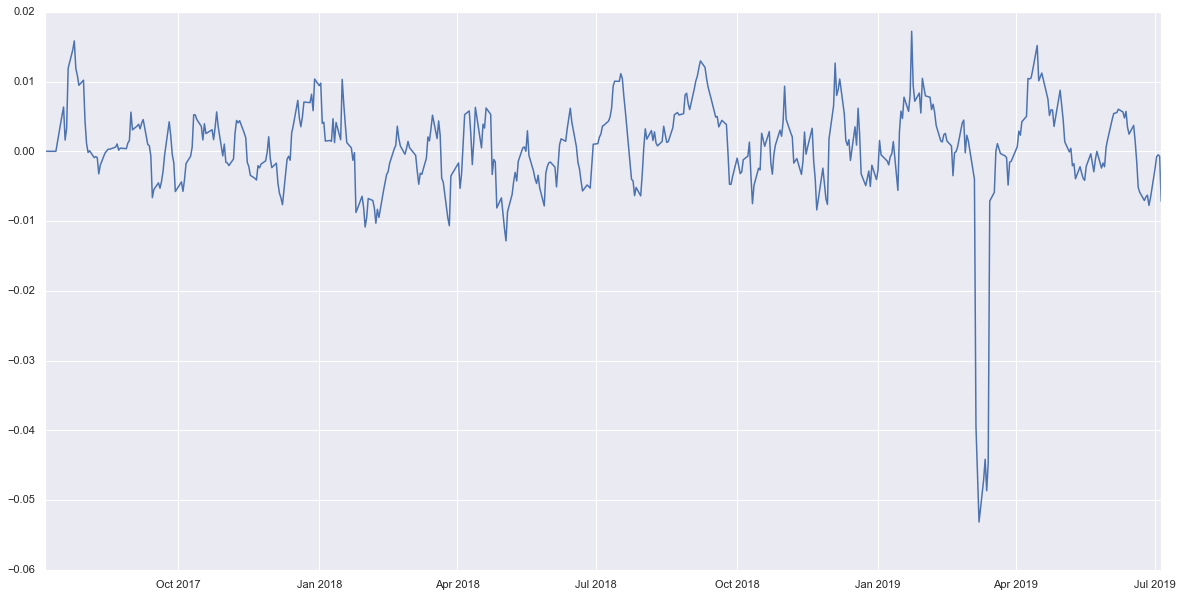

In [85]:
import pandas as pd
crrDate = pd.to_datetime(filter_wipro['Date'])
crrLis = crrDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(crrLis,rolling_avg_wipro.fillna(0).tolist())
plt.show()

# Query 2.8 
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

In [88]:
nif_load = pd.read_csv('NIFTY50_data.csv')
nif_load

,Date,Open,High,Low,Close
0,05 Jul 2019,11964.75,11981.75,11797.90,11811.15
1,04 Jul 2019,11928.80,11969.25,11923.65,11946.75
2,03 Jul 2019,11932.15,11945.20,11887.05,11916.75
3,02 Jul 2019,11890.30,11917.45,11814.70,11910.30
4,01 Jul 2019,11839.90,11884.65,11830.80,11865.60
5,28 Jun 2019,11861.15,11871.70,11775.50,11788.85
6,27 Jun 2019,11860.85,11911.15,11821.05,11841.55
7,26 Jun 2019,11768.15,11871.85,11757.55,11847.55
8,25 Jun 2019,11681.00,11814.40,11651.00,11796.45
9,24 Jun 2019,11725.80,11754.00,11670.20,11699.65


<Figure size 1440x720 with 0 Axes>

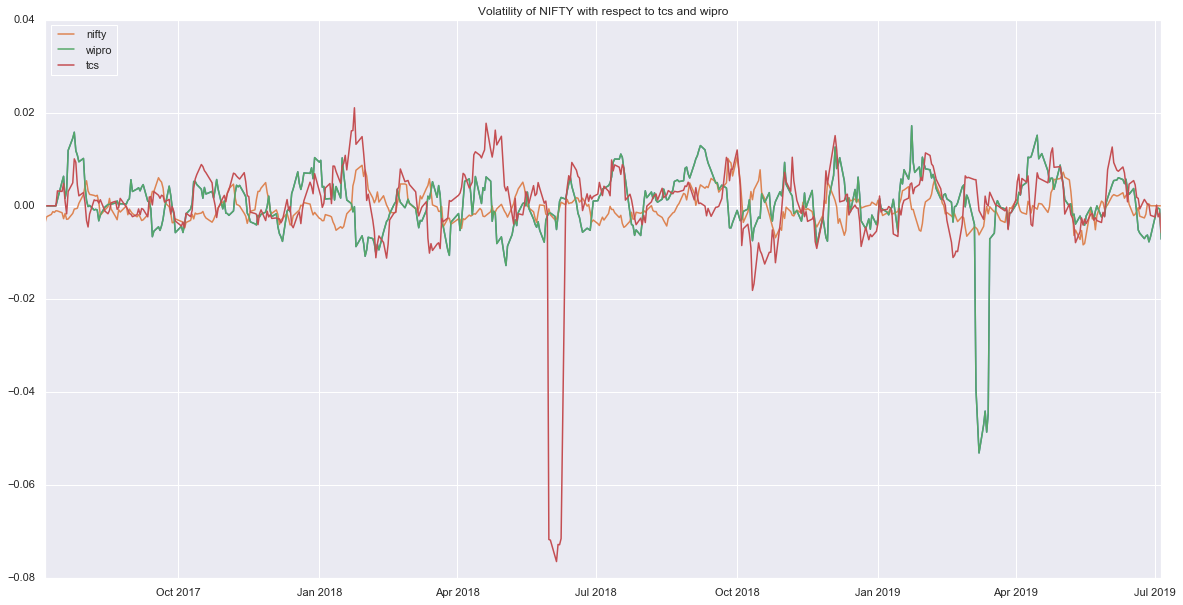

In [102]:
nif_close_price = nif_load['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nif_load['Date'])
nifDate = nifDate.tolist()
plt.figure(figsize=(20,10))

tcs_Date = pd.to_datetime(filter_tcs['Date'])
tcsLis = tcs_Date.tolist()
tcs_close_price = filter_tcs['Close Price']
tcs_change = tcs_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize=(20,10))
plt.plot(tcsLis,rolling_avg_wipro.fillna(0).tolist())

plt.title("Volatility of NIFTY with respect to tcs and wipro")
plt.plot(nifDate,nif_change.tolist(),label = 'nifty')
plt.plot(crrLis,rolling_avg_wipro.fillna(0).tolist(),label = 'wipro')
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

# Query 2.9 
Trade Calls - Using Simple Moving Averages. Study about moving averages here.Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

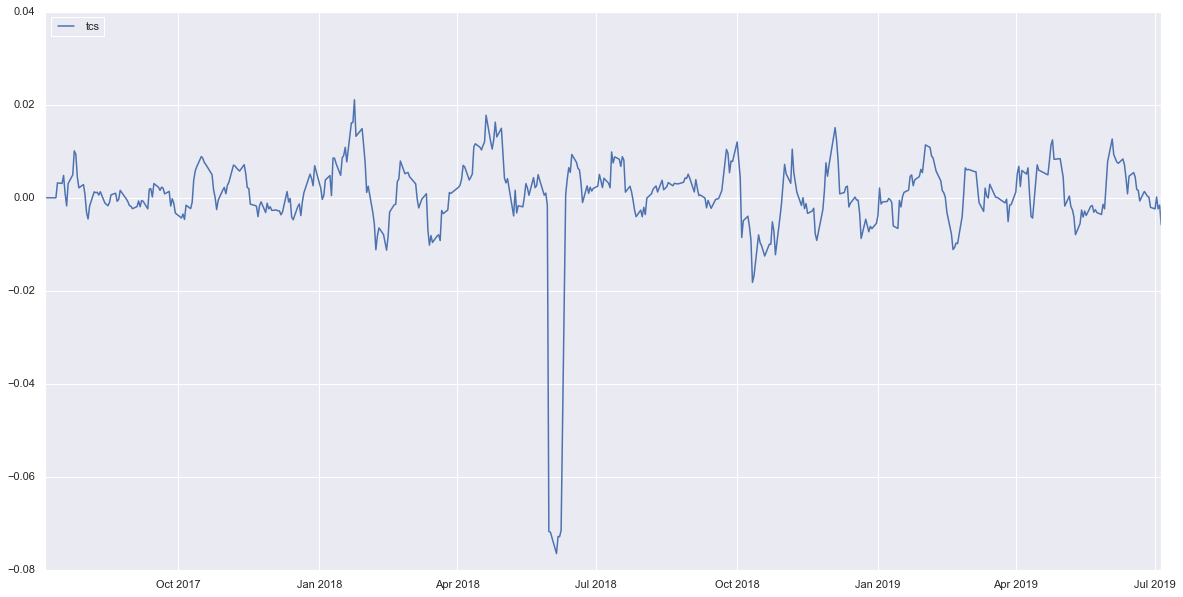

In [104]:
# we will use tcs stocks for applying buy/sell signals
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

In [148]:
#making short and long signals
short_window = 21
long_window = 34

signals = pd.DataFrame(index=filter_tcs.index)
signals['signal'] = 0.0

#SMA of Short Window
signals['short_mavg'] = filter_tcs['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

#SMA of Long Window
signals['long_mavg'] = filter_tcs['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

#Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

#Generate trading orders
signals['positions'] = signals['signal'].diff()
print(signals)

# filter_tcs['Date'] = pd.to_datetime(filter_tcs['Date'])
# filter_tcs.set_index('Date', inplace=True)
# filter_tcs

            signal   short_mavg    long_mavg  positions
Date                                                   
2017-07-06     0.0  2347.550000  2347.550000        NaN
2017-07-07     0.0  2339.750000  2339.750000        0.0
2017-07-10     0.0  2371.483333  2371.483333        0.0
2017-07-11     0.0  2397.562500  2397.562500        0.0
2017-07-12     0.0  2405.940000  2405.940000        0.0
2017-07-13     0.0  2412.683333  2412.683333        0.0
2017-07-14     0.0  2410.507143  2410.507143        0.0
2017-07-17     0.0  2408.625000  2408.625000        0.0
2017-07-18     0.0  2408.594444  2408.594444        0.0
2017-07-19     0.0  2412.695000  2412.695000        0.0
2017-07-20     0.0  2415.604545  2415.604545        0.0
2017-07-21     0.0  2421.904167  2421.904167        0.0
2017-07-24     0.0  2430.273077  2430.273077        0.0
2017-07-25     0.0  2440.360714  2440.360714        0.0
2017-07-26     0.0  2448.070000  2448.070000        0.0
2017-07-27     0.0  2450.171875  2450.171875    

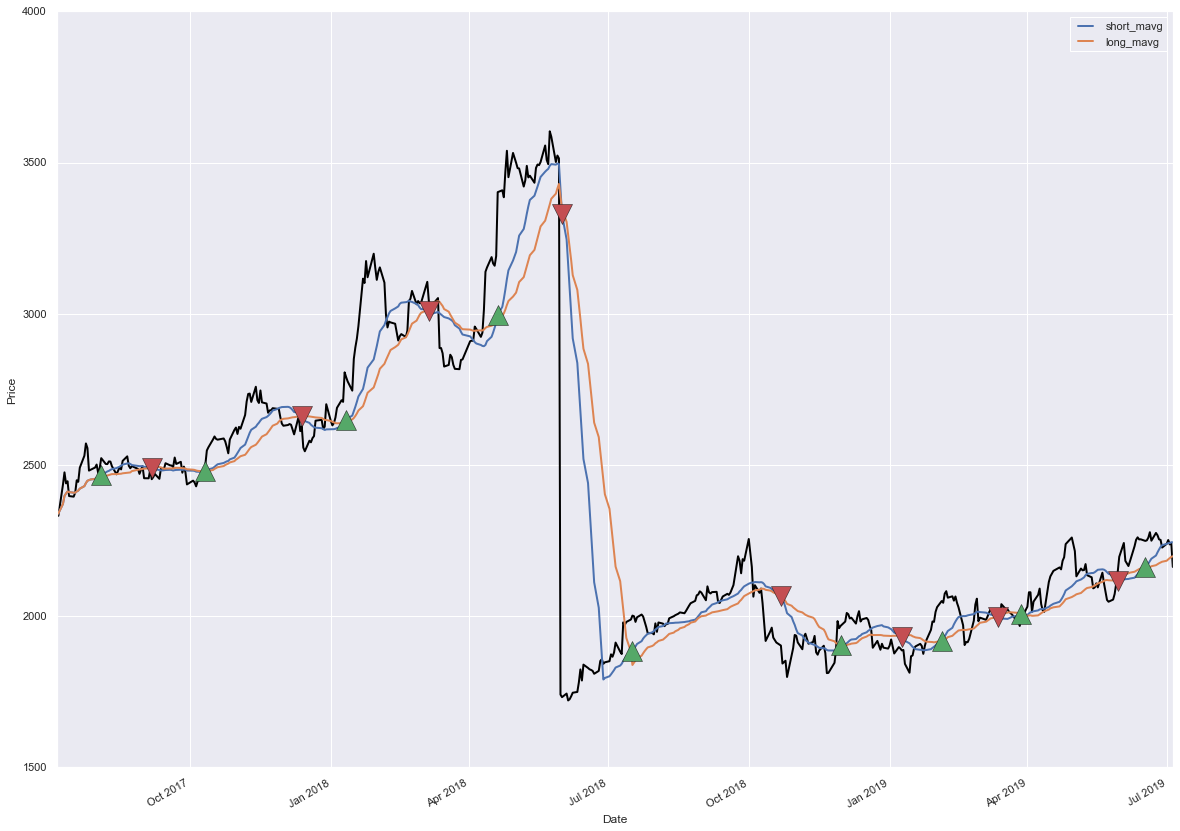

In [149]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
filter_tcs['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

# 2.10 Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

<Figure size 1440x1080 with 0 Axes>

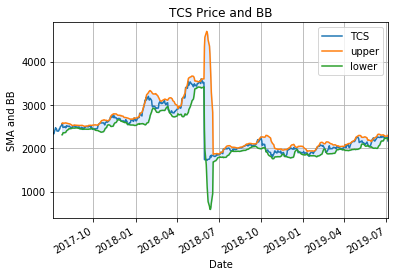

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'TCS'

# read csv file, use date as index and read close as a column
df = pd.read_csv('tcs_stock_data.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# calculate the standar deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()